<font color="Yellow" size="6">Neural Networks</font>

<font color="yellow" size="6">3_RBM_EXAMPLE_1(RBM+PCA) </font>

A Restricted Boltzmann Machine (RBM) is a type of stochastic neural network that is used for unsupervised learning tasks. It is particularly used for dimensionality reduction, classification, regression, collaborative filtering, feature extraction, and as a building block for deep learning models.

RBM Architecture:

    Visible layer (v): Represents the observed data (input features).
    Hidden layer (h): Represents the learned features.
    Weights (W): The connection between the visible and hidden layers.
    Biases: There are biases for both the visible and hidden layers.

Training:

The training process of an RBM aims to adjust the weights so that the network can reconstruct the visible layer from the hidden layer with minimal error. This is done by training the network using Contrastive Divergence (CD), which approximates the gradient of the log-likelihood of the data.

Applications of RBM:

    Dimensionality reduction: Learning efficient representations of the input data.
    Feature learning: Automatically learning features from input data.
    Collaborative filtering: For example, in recommendation systems.
    Deep learning: RBMs can be stacked to form Deep Belief Networks (DBNs) for more complex learning tasks.

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.neural_network import BernoulliRBM
from sklearn.model_selection import train_test_split


In [2]:
# Load the Wine dataset
wine = load_wine()
X = wine.data  # Features
y = wine.target  # Target variable (Wine classes)

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize data (important for RBM)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [3]:
# Initialize the BernoulliRBM model with a given number of components (hidden units)
rbm = BernoulliRBM(n_components=10, random_state=42)

In [4]:
# Fit the RBM model
rbm.fit(X_train)


BernoulliRBM(n_components=10, random_state=42)

In [5]:
# Transform the data to the hidden layer space
X_train_rbm = rbm.transform(X_train)
X_test_rbm = rbm.transform(X_test)

In [6]:
# Visualizing the transformed data using PCA for dimensionality reduction
pca = PCA(n_components=2)
X_train_rbm_pca = pca.fit_transform(X_train_rbm)
X_test_rbm_pca = pca.transform(X_test_rbm)

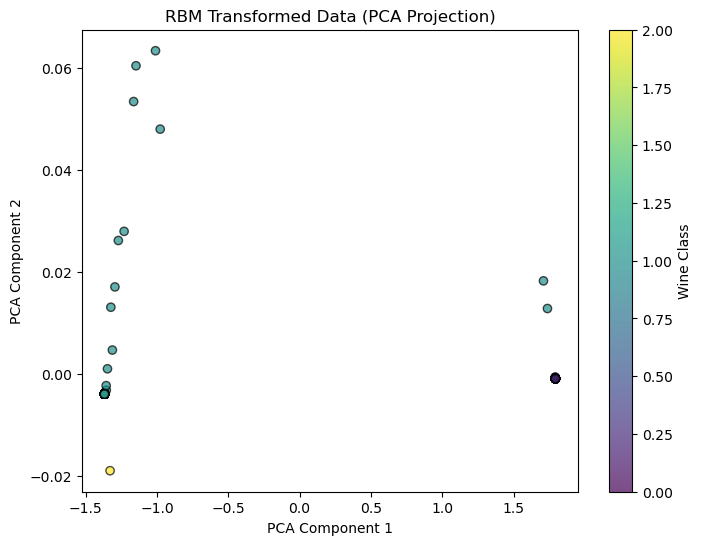

In [7]:
# Plot the transformed data (projected into 2D)
plt.figure(figsize=(8, 6))
plt.scatter(X_train_rbm_pca[:, 0], X_train_rbm_pca[:, 1], c=y_train, cmap='viridis', edgecolor='k', alpha=0.7)
plt.title('RBM Transformed Data (PCA Projection)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Wine Class')
plt.show()

BernoulliRBM:

    We initialize a BernoulliRBM with 10 hidden units (n_components=10). This controls the number of features that the RBM will learn.
    The model is fitted to the training data using rbm.fit(X_train).

Transformation:

    After training, we use the transform() method to obtain the activations of the hidden layer (feature representations) from the input data.

Dimensionality Reduction (PCA):

    Since RBMs typically output a higher-dimensional space, we use PCA (Principal Component Analysis) to reduce the transformed data to 2D for visualization.